<a href="https://colab.research.google.com/github/JuanPaBL2/Data-Science-Machine-Learning-Proyects-Argentina-Programa-4.0-course-/blob/main/Trabajo_Practico_Redes_Neuronales_(grupo_Z)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***TRABAJO PRACTICO- REDES NEURONALES***

#Apellido, Nombre, DNI, email de todos los integrantes del grupo

Juan Pablo Del Rosso. 41.315.883. Juanpablo_delrosso@outlook.com.ar

Eduardo Gabriel López 35780341 lopezeduardogabriel@gmail.com

Miguel cardenas 27312487 Mrhydeto@hotmail.com

Lucas Careggio ; 36588791 ; Lucascareggio@gmail.com

willams alejandro Palavecino 38721321 willisg2013@gmail.com

Silvana Vanesa Gomez 37065985  silvanagomez.cute@gmail.com

Nicolas Alejandro Laime 38634757
nicolas.ale.526@gmail.com

Florencia Iglesias 41159519 iglesias.florencia11@gmail.com

Se les proporcionará una base de datos de ciudades de Argentina y los registros de Máxima y Mínima temperatura a lo largo de un año.Dicha base de datos fue obtenida del registro nacional de las siguientes enlaces: [detalle de la base de datos](https://datos.gob.ar/dataset/smn-registro-temperatura-365-dias/archivo/smn_5.1) - [REGISTRO DE TEMPERATURA 365 DIAS](https://www.smn.gob.ar/descarga-de-datos).

La base de datos también podra ser descargada del sigueinte enlace del drive [BASE DE DATOS](https://drive.google.com/drive/folders/18rTLeY5A8DOwz39TB563HPHIpZTJM3CA?usp=sharing)

Se deberá ralizar los siguientes pasos.


1.   Seleccionar una ciudad y reconstruir una nueva base de datos tomando la temperatura promedio entre la max y min de cada dia, para dicha ciudad. Graficar dichos datos TIEMPO VS TEMPERATURA Y SELECCIONAR UN PERIODO DE TIEMPO DONDE LA GRAFICA SEA CRECIENTE. Esto servira para construir una nueva base de datos.


2.  Agregar a la nueva base de datos creada del insciso anterior una columna con las siguientes variables , generadas a través de simulación aleatoria:


   * VARIABLE: PRECIO DEL KILO DE HELADO- construir esta variable usando simulación aleatoria de regresión lineal en función de la temperatura. De manera que a mayor temperatura el precio sea MAYOR,  a menor temperatura el precio será menor. Definir el  rango del precio del helado y la tasa o porcentaje de incremento del precio
  
   * COMPRA HELADO: VARIABLE CATEGORICA , RESPUESTA SI/NO. Generar esta variable con simulación aleatoria de manera que si el precio del helado es mas del 40 % del precio inicial, la persona decide NO COMPRAR EL HELADO, ESTO SUCEDE CON UNA PROPORCION O PROBABILIDAD DEL 80% DE LA CANTIDAD TOTAL DE REGISTROS.

3. GENERAR TRES  PERCEPTRONES (SEGUIR LOS EJEMPLOS MOSTRADOS DE PERCEPTRON EN CLASE)CONECTADOS ENTRE SI DE MANERA QUE TENGA COMO CONDICIÓN LO SIGUIENTE:

  * SI HACEN MÁS DE 27 GRADOS DE TEMPERATURA O INCLUSIVE SI EL PRECIO DEL HELADO ESTA POR DEBAJO DEL 40 % DE INCREMENTO, LA RED NEURONAL DEBERA INDICAR QUE SE COMPRA EL HELADO. ( los pesos colocarlos de manera aleatoria, usar la función de salto finito o función sigmoide para la activación)

4. Luego de diseñar los perceptrones, implementarlos sobre la base de datos generada de manera que se les pase por argumento las variables: TEMPERATURA PROMEDIO, PRECIO DEL HELADO. Comparar la proporción de respuestas correctas en las que coincide el resultado de la red neuronal , con la variable COMPRA HELADOS . Esto último es una forma de medir la exactitud de la red.

# 1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from datetime import datetime

#creo dataframe original
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRuz0-niftzhReN-yCOkPmgzjf9W8MPzxqeYzBqVnoylf5F2GgMkjvF8Li_m7y1Uu71qClFokibtEth/pub?output=csv"
df = pd.read_csv(url)
print("\nVISTA PREVIA DATAFRAME ORIGINAL\n")
df.head(10)


VISTA PREVIA DATAFRAME ORIGINAL



<ipython-input-1-7e114795f552>:11: DtypeWarning: Columns (0,1,2,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,FECHA,NaN,NaN,NaN,TMAX,NaN,TMIN,NaN,NOMBRE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,--------,-----,-----,----------------------------------------,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29102023,NaN,23.0,NaN,17.9,AEROPARQUE,AERO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29102023,NaN,22.9,NaN,14.2,AZUL,AERO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29102023,NaN,22.1,NaN,NaN,8.1,BAHIA,BLANCA,AERO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,29102023,NaN,NaN,3.5,NaN,-0.3,BARILOCHE,AERO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,29102023,NaN,-4.7,-11.6,BASE,BELGRANO,II,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,29102023,NaN,-6.2,NaN,-9.4,BASE,CARLINI,(EX,JUBANY),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,29102023,NaN,-7.3,-13.7,BASE,ESPERANZA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,29102023,NaN,-9.5,-19.7,BASE,MARAMBIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#creo nuevo dataframe con ciudad seleccionada
df2 = df[df["Unnamed: 6"] == 'PICO']

#elimino columnas innecesarias del nuevo dataframe
columnas = ["Unnamed: 1", "Unnamed: 3", "Unnamed: 8","Unnamed: 7","Unnamed: 9","Unnamed: 10","Unnamed: 11","Unnamed: 12","Unnamed: 13","Unnamed: 14","Unnamed: 15","Unnamed: 16","Unnamed: 17"]
df3 = df2.drop(columnas, axis=1)
#modifico nombre de columnas
df3.rename(columns={'Unnamed: 2': 'Temperatura MAX', "Unnamed: 4" : "Temperatura MIN", "Unnamed: 0" : "Fecha", "Unnamed: 5" : "Ciudad", "Unnamed: 6" : "Ciudad"}, inplace=True)
print("\nNUEVO DATAFRAME CON CIUDAD SELECCIONADA\n")
df3.head(10)



NUEVO DATAFRAME CON CIUDAD SELECCIONADA



,Fecha,Temperatura MAX,Temperatura MIN,Ciudad,Ciudad
38,29102023,24.4,11.7,GENERAL,PICO
157,28102023,31.5,10.0,GENERAL,PICO
276,27102023,28.8,10.5,GENERAL,PICO
395,26102023,28.0,11.2,GENERAL,PICO
514,25102023,24.2,11.2,GENERAL,PICO
633,24102023,17.7,11.3,GENERAL,PICO
752,23102023,20.4,14.5,GENERAL,PICO
871,22102023,23.7,15.5,GENERAL,PICO
990,21102023,29.4,14.5,GENERAL,PICO
1109,20102023,31.2,10.0,GENERAL,PICO


In [3]:
#transformo los valores de temperatura a float
df3[['Temperatura MAX', 'Temperatura MIN']] = df3[['Temperatura MAX', 'Temperatura MIN']].astype(float)

#creo nueva columna con calculo de promedio entre temperatura minima y maxima por dia
df3['Temperatura Promedio'] = (df3['Temperatura MAX'] + df3['Temperatura MIN']) / 2

#muestro dicha columna
df3.head(100)

,Fecha,Temperatura MAX,Temperatura MIN,Ciudad,Ciudad,Temperatura Promedio
38,29102023,24.4,11.7,GENERAL,PICO,18.05
157,28102023,31.5,10.0,GENERAL,PICO,20.75
276,27102023,28.8,10.5,GENERAL,PICO,19.65
395,26102023,28.0,11.2,GENERAL,PICO,19.60
514,25102023,24.2,11.2,GENERAL,PICO,17.70
...,...,...,...,...,...,...
29102,28022023,38.5,18.5,GENERAL,PICO,28.50
29339,26022023,29.6,10.0,GENERAL,PICO,19.80
29456,25022023,34.0,16.8,GENERAL,PICO,25.40
29574,24022023,34.2,14.5,GENERAL,PICO,24.35


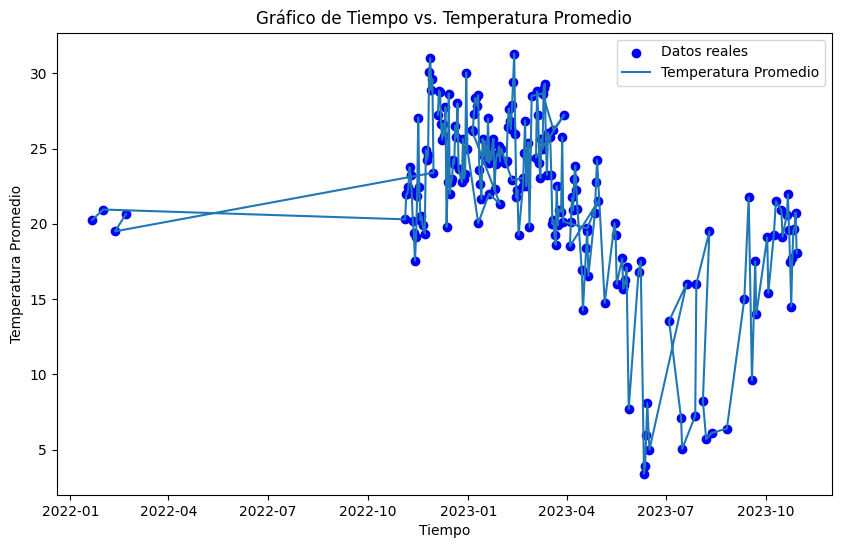


PERIODO DONDE INICIA LA GRAFICA CRECIENTE



,Fecha,Temperatura MAX,Temperatura MIN,Ciudad,Ciudad,Temperatura Promedio
16092,2023-06-16,15.0,-5.0,GENERAL,PICO,5.0


In [4]:
# Agrego una columna con las fechas en formato date
df3['Fecha'] = pd.to_datetime(df3['Fecha'], format='%d%m%Y', errors='coerce')

# Crear un gráfico
plt.figure(figsize=(10, 6))
plt.scatter(df3['Fecha'], df3['Temperatura Promedio'], color='blue', label='Datos reales')
plt.plot(df3['Fecha'], df3['Temperatura Promedio'], label='Temperatura Promedio')
plt.xlabel('Tiempo')
plt.ylabel('Temperatura Promedio')
plt.title('Gráfico de Tiempo vs. Temperatura Promedio')
plt.legend()
plt.show()

#periodo donde la grafica es creciente
subset_df = df3[df3['Temperatura Promedio'] == 5]
print("\nPERIODO DONDE INICIA LA GRAFICA CRECIENTE\n")
subset_df.head()

# 2)

In [5]:
#________VARIABLE PRECIO HELADO________

#establezco precio minimo y maximo de la aleatoriedad
precio_min = 1
precio_max = 20
#Grado de aumento del precio por valor de temp
aumento_por_grado = 0.5

#Genera precios del helado basados en la temperatura promedio
df3['Precio del Helado'] = precio_min + (df3['Temperatura Promedio'] * aumento_por_grado)
df3['Precio del Helado'] = np.minimum(df3['Precio del Helado'], precio_max)

#muestro df con la nueva variable
df3.head(100)


,Fecha,Temperatura MAX,Temperatura MIN,Ciudad,Ciudad,Temperatura Promedio,Precio del Helado
38,2023-10-29,24.4,11.7,GENERAL,PICO,18.05,10.025
157,2023-10-28,31.5,10.0,GENERAL,PICO,20.75,11.375
276,2023-10-27,28.8,10.5,GENERAL,PICO,19.65,10.825
395,2023-10-26,28.0,11.2,GENERAL,PICO,19.60,10.800
514,2023-10-25,24.2,11.2,GENERAL,PICO,17.70,9.850
...,...,...,...,...,...,...,...
29102,2023-02-28,38.5,18.5,GENERAL,PICO,28.50,15.250
29339,2023-02-26,29.6,10.0,GENERAL,PICO,19.80,10.900
29456,2023-02-25,34.0,16.8,GENERAL,PICO,25.40,13.700
29574,2023-02-24,34.2,14.5,GENERAL,PICO,24.35,13.175


In [6]:
import sklearn.utils as sk

In [7]:
#________VARIABLE CATEGORICA COMPRA HELADO________

#Calcular el precio inicial
precio_inicial = df3['Precio del Helado'].iloc[0]

#Calcular el porcentaje de cambio en el precio en comparación con el precio inicial
df3['PORCENTAJE_CAMBIO'] = ((df3['Precio del Helado'] - precio_inicial) / precio_inicial) * 100

#mezclo las filas de forma aleaotrias
df3 = sk.shuffle(df3)

#Definir la probabilidad de compra del helado
probabilidad_compra = 0.8  # 80% de probabilidad de compra para la condicion del 40%

#Generar valores aleatorios entre 0 y 1
aleatorios = np.random.rand(len(df3))

#Comparar los valores aleatorios con la probabilidad de compra
df3['COMPRA HELADO'] = np.where(aleatorios < probabilidad_compra, 'SI', 'NO')

df3.head(50)

,Fecha,Temperatura MAX,Temperatura MIN,Ciudad,Ciudad,Temperatura Promedio,Precio del Helado,PORCENTAJE_CAMBIO,COMPRA HELADO
16332,2023-06-14,17.7,-1.5,GENERAL,PICO,8.10,5.050,-49.625935,SI
10268,2023-08-04,18.5,-2.0,GENERAL,PICO,8.25,5.125,-48.877805,SI
38657,2022-12-10,34.7,17.0,GENERAL,PICO,25.85,13.925,38.902743,SI
25730,2023-03-28,33.0,18.5,GENERAL,PICO,25.75,13.875,38.403990,SI
4440,2023-09-22,17.5,10.5,GENERAL,PICO,14.00,8.000,-20.199501,SI
24642,2023-04-06,28.5,15.0,GENERAL,PICO,21.75,11.875,18.453865,SI
29692,2023-02-23,33.0,12.0,GENERAL,PICO,22.50,12.250,22.194514,NO
26092,2023-03-25,27.0,14.9,GENERAL,PICO,20.95,11.475,14.463840,SI
27297,2023-03-15,32.8,19.3,GENERAL,PICO,26.05,14.025,39.900249,SI
37329,2022-12-21,32.5,19.0,GENERAL,PICO,25.75,13.875,38.403990,SI


# 3)

GENERAR TRES PERCEPTRONES (SEGUIR LOS EJEMPLOS MOSTRADOS DE PERCEPTRON EN CLASE)CONECTADOS ENTRE SI DE MANERA QUE TENGA COMO CONDICIÓN LO SIGUIENTE:

SI HACEN MÁS DE 27 GRADOS DE TEMPERATURA O INCLUSIVE SI EL PRECIO DEL HELADO ESTA POR DEBAJO DEL 40 % DE INCREMENTO, LA RED NEURONAL DEBERA INDICAR QUE SE COMPRA EL HELADO. ( los pesos colocarlos de manera aleatoria, usar la función de salto finito o función sigmoide para la activación)

In [8]:
# 1 solo perceptron
# Datos de entrada
temperatura = df3['Temperatura Promedio'].reset_index(drop=True)
porcentaje_cambio = df3['PORCENTAJE_CAMBIO'].reset_index(drop=True)

# Restablecer los índices para que comiencen desde 0
temperatura = temperatura.reset_index(drop=True)
porcentaje_cambio = porcentaje_cambio.reset_index(drop=True)

# Definir la función de activación tipo escalón
def perceptron(input_features, weights, threshold):
    # Calcular la suma ponderada de las características y los pesos
    weighted_sum = np.dot(input_features, weights)

    # Aplicar la función de activación tipo escalón
    if weighted_sum > threshold:
        return 1  # Comprar helado ('SI')
    else:
        return 0  # No comprar helado ('NO')

# Generar pesos aleatorios para el perceptrón
weights = np.random.rand(2)  # Dos características: temperatura y porcentaje de cambio

# Establecer el umbral
threshold = 0.5  # Rango entre 0 y 1

# Crear una lista para almacenar las decisiones de compra
compra_helado = []

# Iterar a través de los datos de entrada
for i in range(len(temperatura)):
    features = np.array([temperatura[i], porcentaje_cambio[i]])
    if temperatura[i] > 27 or porcentaje_cambio[i] < 0.4:
        decision = 1  # Comprar helado ('SI')
    else:
        decision = 0  # No comprar helado ('NO')
    compra_helado.append(decision)

# Agregar la decisión de compra a df3
df3['1 perceptron COMPRA HELADO'] = np.where(compra_helado, 'SI', 'NO')
df3.head(50)

,Fecha,Temperatura MAX,Temperatura MIN,Ciudad,Ciudad,Temperatura Promedio,Precio del Helado,PORCENTAJE_CAMBIO,COMPRA HELADO,1 perceptron COMPRA HELADO
16332,2023-06-14,17.7,-1.5,GENERAL,PICO,8.10,5.050,-49.625935,SI,SI
10268,2023-08-04,18.5,-2.0,GENERAL,PICO,8.25,5.125,-48.877805,SI,SI
38657,2022-12-10,34.7,17.0,GENERAL,PICO,25.85,13.925,38.902743,SI,NO
25730,2023-03-28,33.0,18.5,GENERAL,PICO,25.75,13.875,38.403990,SI,NO
4440,2023-09-22,17.5,10.5,GENERAL,PICO,14.00,8.000,-20.199501,SI,SI
24642,2023-04-06,28.5,15.0,GENERAL,PICO,21.75,11.875,18.453865,SI,NO
29692,2023-02-23,33.0,12.0,GENERAL,PICO,22.50,12.250,22.194514,NO,NO
26092,2023-03-25,27.0,14.9,GENERAL,PICO,20.95,11.475,14.463840,SI,NO
27297,2023-03-15,32.8,19.3,GENERAL,PICO,26.05,14.025,39.900249,SI,NO
37329,2022-12-21,32.5,19.0,GENERAL,PICO,25.75,13.875,38.403990,SI,NO


In [9]:
# 3  perceptrones
# Datos de entrada
temperatura = df3['Temperatura Promedio']
porcentaje_cambio = df3['PORCENTAJE_CAMBIO']

# Función de activación sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generar pesos aleatorios para el primer perceptrón (temperatura)
w1 = np.random.rand(1)

# Salida del primer perceptrón
output1 = sigmoid(w1 * temperatura)

# Generar pesos aleatorios para el segundo perceptrón (porcentaje de cambio)
w2 = np.random.rand(1)

# Salida del segundo perceptrón
output2 = sigmoid(w2 * porcentaje_cambio)

# Aplicar la condición de "SI HACEN MÁS DE 27 GRADOS DE TEMPERATURA"
condicion_temperatura = temperatura > 27

# Aplicar la condición de "SI EL PRECIO DEL HELADO ESTÁ POR DEBAJO DEL 40 % DE INCREMENTO"
condicion_precio = porcentaje_cambio < 0.4

# Salida del tercer perceptrón
output3 = np.where(condicion_temperatura | condicion_precio, output2, output1)

# Condición para comprar helado
comprar_helado = output3 > 0.5

# Agregar la decisión de compra a df3
df3['Red Neuronal COMPRA HELADO'] = np.where(comprar_helado, 'SI', 'NO')

df3.head(50)

,Fecha,Temperatura MAX,Temperatura MIN,Ciudad,Ciudad,Temperatura Promedio,Precio del Helado,PORCENTAJE_CAMBIO,COMPRA HELADO,1 perceptron COMPRA HELADO,Red Neuronal COMPRA HELADO
16332,2023-06-14,17.7,-1.5,GENERAL,PICO,8.10,5.050,-49.625935,SI,SI,NO
10268,2023-08-04,18.5,-2.0,GENERAL,PICO,8.25,5.125,-48.877805,SI,SI,NO
38657,2022-12-10,34.7,17.0,GENERAL,PICO,25.85,13.925,38.902743,SI,NO,SI
25730,2023-03-28,33.0,18.5,GENERAL,PICO,25.75,13.875,38.403990,SI,NO,SI
4440,2023-09-22,17.5,10.5,GENERAL,PICO,14.00,8.000,-20.199501,SI,SI,NO
24642,2023-04-06,28.5,15.0,GENERAL,PICO,21.75,11.875,18.453865,SI,NO,SI
29692,2023-02-23,33.0,12.0,GENERAL,PICO,22.50,12.250,22.194514,NO,NO,SI
26092,2023-03-25,27.0,14.9,GENERAL,PICO,20.95,11.475,14.463840,SI,NO,SI
27297,2023-03-15,32.8,19.3,GENERAL,PICO,26.05,14.025,39.900249,SI,NO,SI
37329,2022-12-21,32.5,19.0,GENERAL,PICO,25.75,13.875,38.403990,SI,NO,SI


4)


In [10]:
# Calcular la proporción de respuestas correctas
proporcion_correctas = (df3['Red Neuronal COMPRA HELADO'] == df3['COMPRA HELADO']).mean()

print(f'Proporción de respuestas correctas: {proporcion_correctas * 100:.2f}%')
proporcion_correctas2 = (df3['1 perceptron COMPRA HELADO'] == df3['COMPRA HELADO']).mean()
print(f'Proporción de respuestas correctas: {proporcion_correctas2 * 100:.2f}%')


Proporción de respuestas correctas: 69.08%
Proporción de respuestas correctas: 42.51%
